In [136]:
# problem statement :predict cloth price 
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [137]:
#upload dataset from github 
data=pd.read_csv('https://raw.githubusercontent.com/abillash/Data-science/main/Brand_dress_finaldata.csv')

In [138]:
# color column contains some mismatching values from 1008 to 1421 index so we will remove that data
data1=data[:1007]

In [139]:
data2=data[1422:]

In [25]:
data1.tail()

,Product,Department,Category,Price,Color
1002,Men Blue Crew Neck Full Sleeves Casual Sweatshirt,Men,Sweatshirts,949,Blue
1003,Men Green Crew Neck Full Sleeves Casual Sweats...,Men,Sweatshirts,"1,099",Green
1004,Men Purple Crew Neck Full Sleeves Casual Sweat...,Men,Sweatshirts,"1,099",Purple
1005,Men Green Crew Neck Full Sleeves Casual Sweats...,Men,Sweatshirts,934,Green
1006,Men Grey Hooded Neck Full Sleeves Casual Sweat...,Men,Sweatshirts,999,Grey


In [140]:
df=pd.concat([data1,data2])
df.reset_index(drop=True,inplace=True)

In [141]:
df.shape

(4013, 5)

In [142]:
df.head()

,Product,Department,Category,Price,Color
0,Men Blue Slim Fit Solid Full Sleeves Casual Sh...,Men,Casual shirts,"₹ 2,449",Blue
1,Men Yellow Slim Fit Solid Casual Shirts,Men,Casual shirts,₹ 974,Yellow
2,Men Navy Custom Fit Check Full Sleeves Casual ...,Men,Casual shirts,"₹ 1,374",Navy
3,Men Navy Slim Fit Solid Full Sleeves Casual Sh...,Men,Casual shirts,"₹ 2,449",Navy
4,Men Peach Slim Fit Solid Casual Shirts,Men,Casual shirts,₹ 974,Peach


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4428 entries, 0 to 4427
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Product     4428 non-null   object
 1   Department  4428 non-null   object
 2   Category    4428 non-null   object
 3   Price       4428 non-null   object
 4   Color       4428 non-null   object
dtypes: object(5)
memory usage: 173.1+ KB


In [145]:
# removing rupee sign from price column
import re
df['Price']=df['Price'].apply(lambda x: re.sub(r'[₹,]','',x))

In [146]:
df.head()

,Product,Department,Category,Price,Color
0,Men Blue Slim Fit Solid Full Sleeves Casual Sh...,Men,Casual shirts,2449,Blue
1,Men Yellow Slim Fit Solid Casual Shirts,Men,Casual shirts,974,Yellow
2,Men Navy Custom Fit Check Full Sleeves Casual ...,Men,Casual shirts,1374,Navy
3,Men Navy Slim Fit Solid Full Sleeves Casual Sh...,Men,Casual shirts,2449,Navy
4,Men Peach Slim Fit Solid Casual Shirts,Men,Casual shirts,974,Peach


In [147]:
df['Price']=pd.to_numeric(df['Price'],errors='coerce')

In [148]:
data.isna().sum()

Product       0
Department    0
Category      0
Price         0
Color         0
dtype: int64

In [149]:
df.dtypes

Product       object
Department    object
Category      object
Price          int64
Color         object
dtype: object

In [150]:
df.columns

Index(['Product', 'Department', 'Category', 'Price', 'Color'], dtype='object')

In [151]:
df.nunique()

Product       1182
Department       4
Category        14
Price          126
Color           42
dtype: int64

In [152]:
# checking value counts in each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    

Men Blue Slim Fit Formal Full Sleeves Formal Shirt             90
Men White Slim Fit Formal Full Sleeves Formal Shirt            51
Men Navy Crew Neck Full Sleeves Casual Sweatshirt              44
Men Pink Slim Fit Formal Full Sleeves Formal Shirt             42
Men Black Crew Neck Full Sleeves Casual Sweatshirt             40
                                                               ..
Boys Brown Regular Fit Stripe Crew Neck Pack of Two T-shirt     1
Boys Red Regular Fit Graphic Print Crew Neck Vest               1
Boys Navy Regular Fit Patterned Crew Neck T-shirt               1
Boys Blue Regular Fit Solid Crew Neck Vest                      1
Men Olive Slim Fit Formal Full Sleeves Formal Shirt             1
Name: Product, Length: 1182, dtype: int64


Men      1810
Boys     1038
Women     670
Girls     495
Name: Department, dtype: int64


Shirts               1002
Sweatshirts           603
Casual shirts         531
T-Shirts              342
Blazers               311
Tops       

In [37]:
df.drop_duplicates(inplace=True)
                  

In [38]:
df.duplicated().sum()

0

In [39]:
#data analysis we can see that no invalid or negative number present
#no missing values
#target variable is a contineous data so its regression problem
#duplicate rows removed
# datatypes are object have to convert float


,Product,Department,Category,Price,Color
count,4428,4428,4428,4428,4428
unique,1290,4,15,130,311
top,Men Blue Slim Fit Formal Full Sleeves Formal S...,Men,Shirts,999,Blue
freq,90,2225,1002,206,565


In [153]:
df.shape

(4013, 5)

Men      1810
Boys     1038
Women     670
Girls     495
Name: Department, dtype: int64


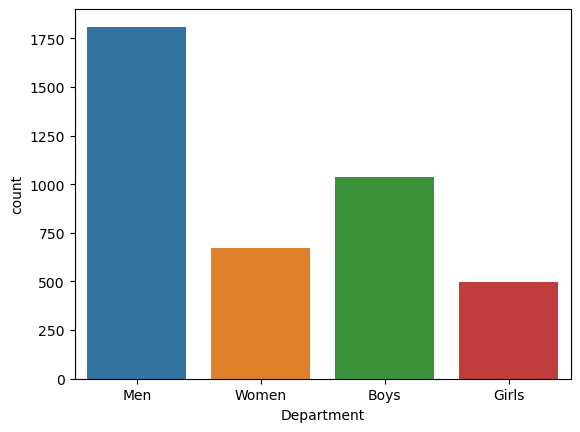

In [122]:
# visualization of data
# 
# eg check value count for department
ax=sns.countplot(x='Department',data=df)
print(df['Department'].value_counts())


Shirts               1002
Sweatshirts           603
Casual shirts         531
T-Shirts              342
Blazers               311
Tops                  290
Jeans                 204
Tops and T-shirts     161
Casual dress          148
Dresses               145
Causual trousers      105
Winterware             74
Bottomware             51
Shorts                 46
Name: Category, dtype: int64


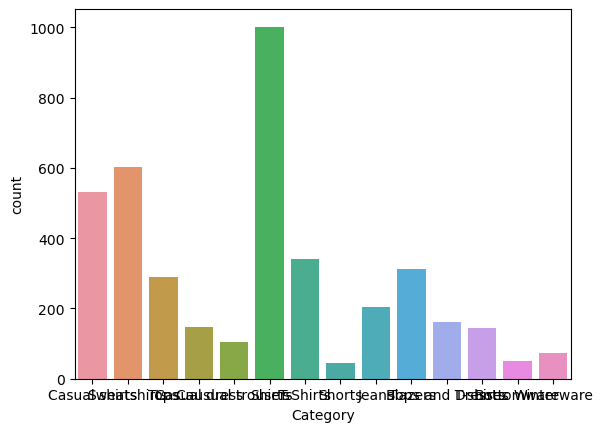

In [71]:
ax=sns.countplot(x='Category',data=df)
print(df['Category'].value_counts())

In [72]:
df.shape

(4013, 5)

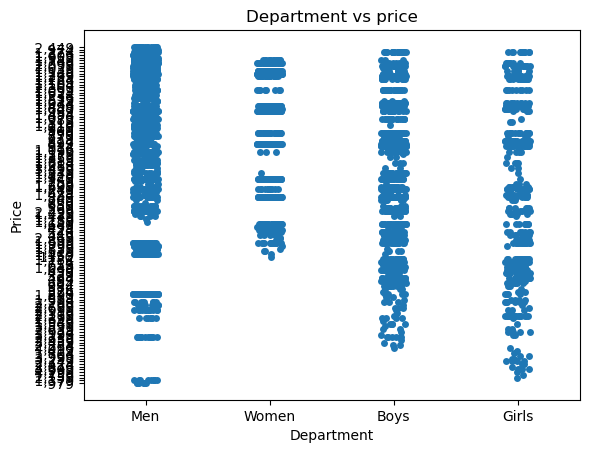

In [75]:
sns.stripplot(x='Department',y='Price',data=df)
plt.title('Department vs price')
plt.show()

In [154]:
# categorical column product convert to neumerical by finding product frequencies and map the product frequencies with corresponding product name 
prod_freq=df['Product'].value_counts(normalize=True)
df['Product_encoded']=df['Product'].map(prod_freq)


ValueError: could not convert string to float: ' 2,449'

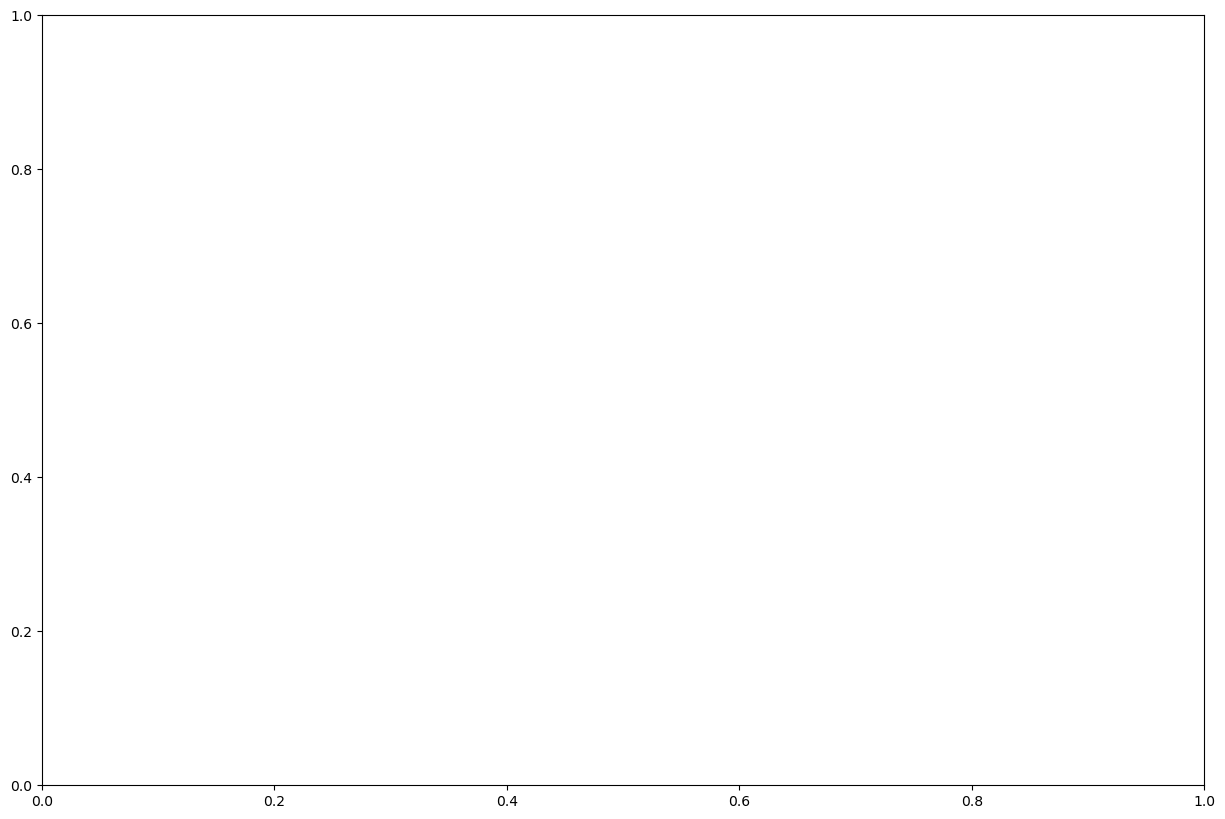

In [155]:
df.head()

,Product,Department,Category,Price,Color,Product_encoded
0,Men Blue Slim Fit Solid Full Sleeves Casual Sh...,Men,Casual shirts,2449,Blue,0.004236
1,Men Yellow Slim Fit Solid Casual Shirts,Men,Casual shirts,974,Yellow,0.000249
2,Men Navy Custom Fit Check Full Sleeves Casual ...,Men,Casual shirts,1374,Navy,0.001744
3,Men Navy Slim Fit Solid Full Sleeves Casual Sh...,Men,Casual shirts,2449,Navy,0.001495
4,Men Peach Slim Fit Solid Casual Shirts,Men,Casual shirts,974,Peach,0.000748


In [156]:
df.dtypes

Product             object
Department          object
Category            object
Price                int64
Color               object
Product_encoded    float64
dtype: object

In [206]:
df.head()

,Department,Category,Price,Color,Product_encoded
0,2.0,3.0,2449,6.0,0.004236
1,2.0,3.0,974,41.0,0.000249
2,2.0,3.0,1374,24.0,0.001744
3,2.0,3.0,2449,24.0,0.001495
4,2.0,3.0,974,32.0,0.000748


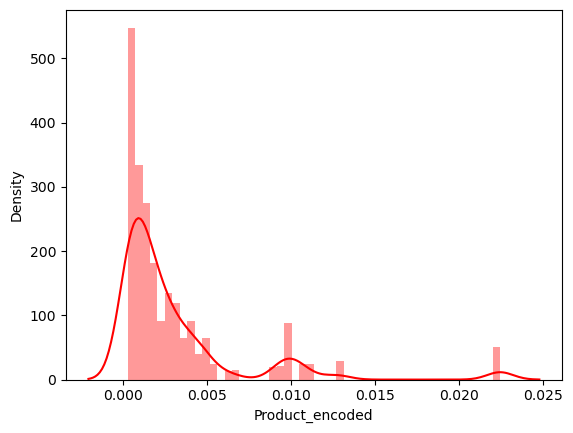

In [207]:
sns.distplot(df['Product_encoded'],color='r')
plt.xlabel('Product_encoded')
plt.show()

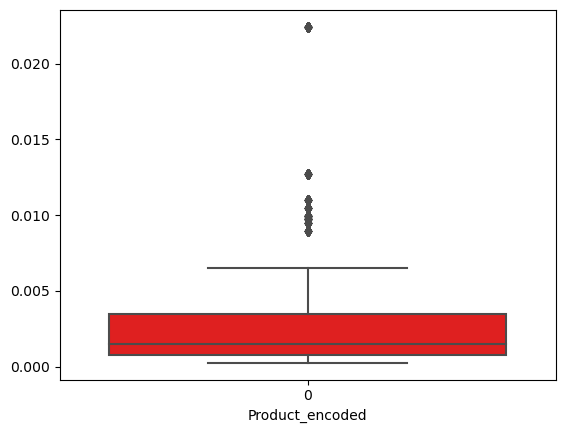

In [209]:
sns.boxplot(df['Product_encoded'],color='r')
plt.xlabel('Product_encoded')
plt.show()

In [210]:
# remove outliers using percentile
from numpy import percentile
columns=df[['Product_encoded']]
for i in columns:
    if isinstance(df[i][0],str):
        continue
    else:
        quartiles=percentile(df[i],[25,75])
        lower_level=quartiles[0]-(1.5*(quartiles[1]-quartiles[0]))
        upper_level=quartiles[1]+(1.5*(quartiles[1]-quartiles[0]))
        df[i]=df[i].apply(lambda x: upper_level if x>upper_level else (lower_level if x < lower_level else x))

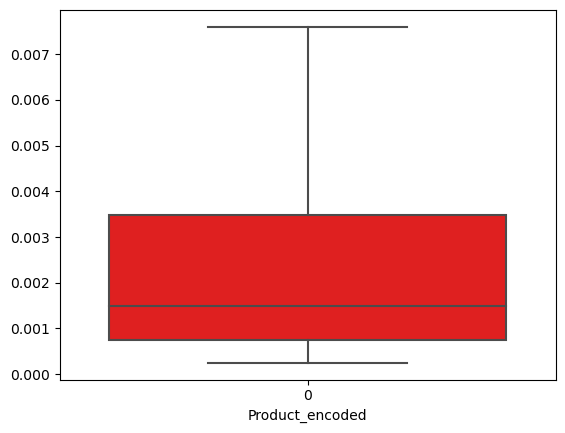

In [211]:
sns.boxplot(df['Product_encoded'],color='r')
plt.xlabel('Product_encoded')
plt.show()

In [212]:

df.shape

(4013, 5)

In [213]:
df.isna().sum()

Department         0
Category           0
Price              0
Color              0
Product_encoded    0
dtype: int64

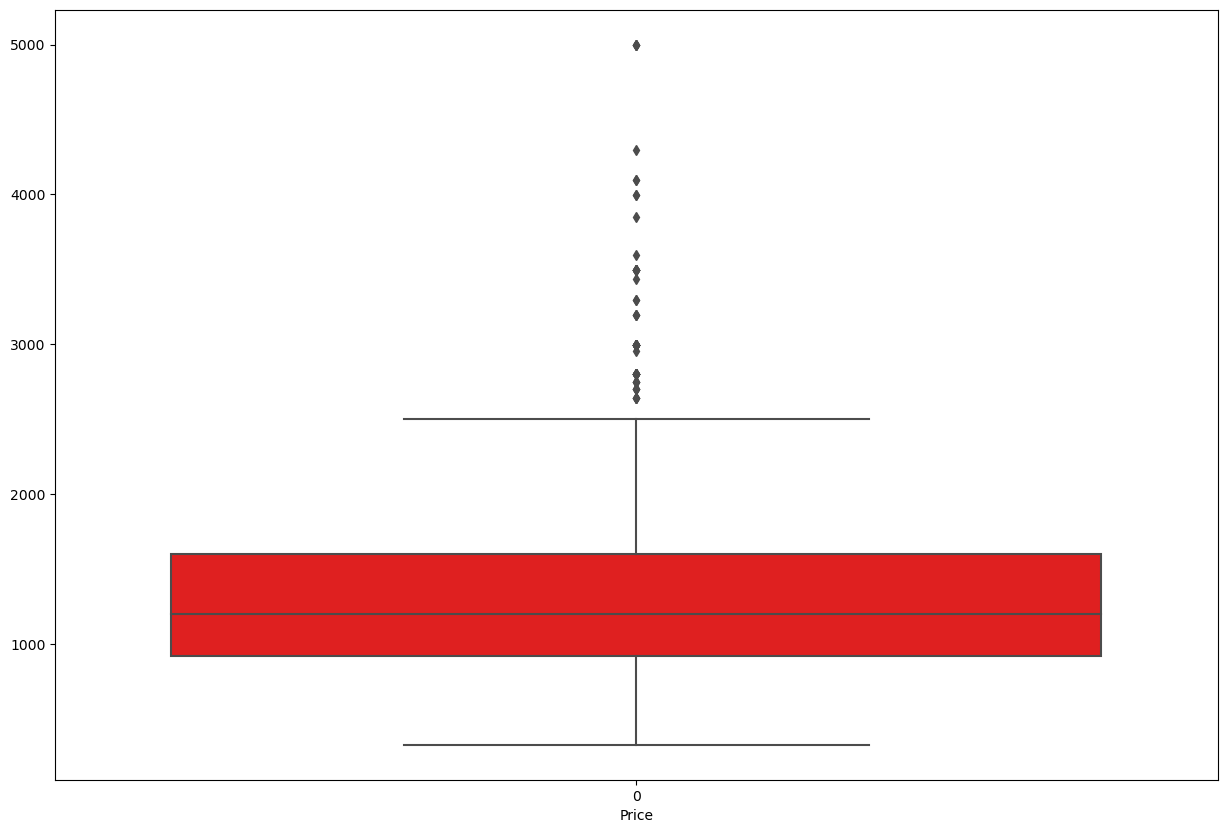

In [159]:
# we have neumerical column product_encoded so we can delete product column
df.drop('Product',axis=1,inplace=True)


In [214]:
df.head()

,Department,Category,Price,Color,Product_encoded
0,2.0,3.0,2449,6.0,0.004236
1,2.0,3.0,974,41.0,0.000249
2,2.0,3.0,1374,24.0,0.001744
3,2.0,3.0,2449,24.0,0.001495
4,2.0,3.0,974,32.0,0.000748


In [215]:
df.isna().sum()

Department         0
Category           0
Price              0
Color              0
Product_encoded    0
dtype: int64

In [162]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df[['Department','Category','Color']]:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Department,Category,Price,Color,Product_encoded
0,2.0,3.0,2449,6.0,0.004236
1,2.0,3.0,974,41.0,0.000249
2,2.0,3.0,1374,24.0,0.001744
3,2.0,3.0,2449,24.0,0.001495
4,2.0,3.0,974,32.0,0.000748
...,...,...,...,...,...
4008,2.0,7.0,1279,2.0,0.009718
4009,2.0,7.0,1439,20.0,0.003239
4010,2.0,7.0,1279,2.0,0.022427
4011,2.0,7.0,2399,30.0,0.010466


In [163]:
df.isna().sum()

Department         0
Category           0
Price              0
Color              0
Product_encoded    0
dtype: int64

In [168]:
df.shape

(4013, 5)

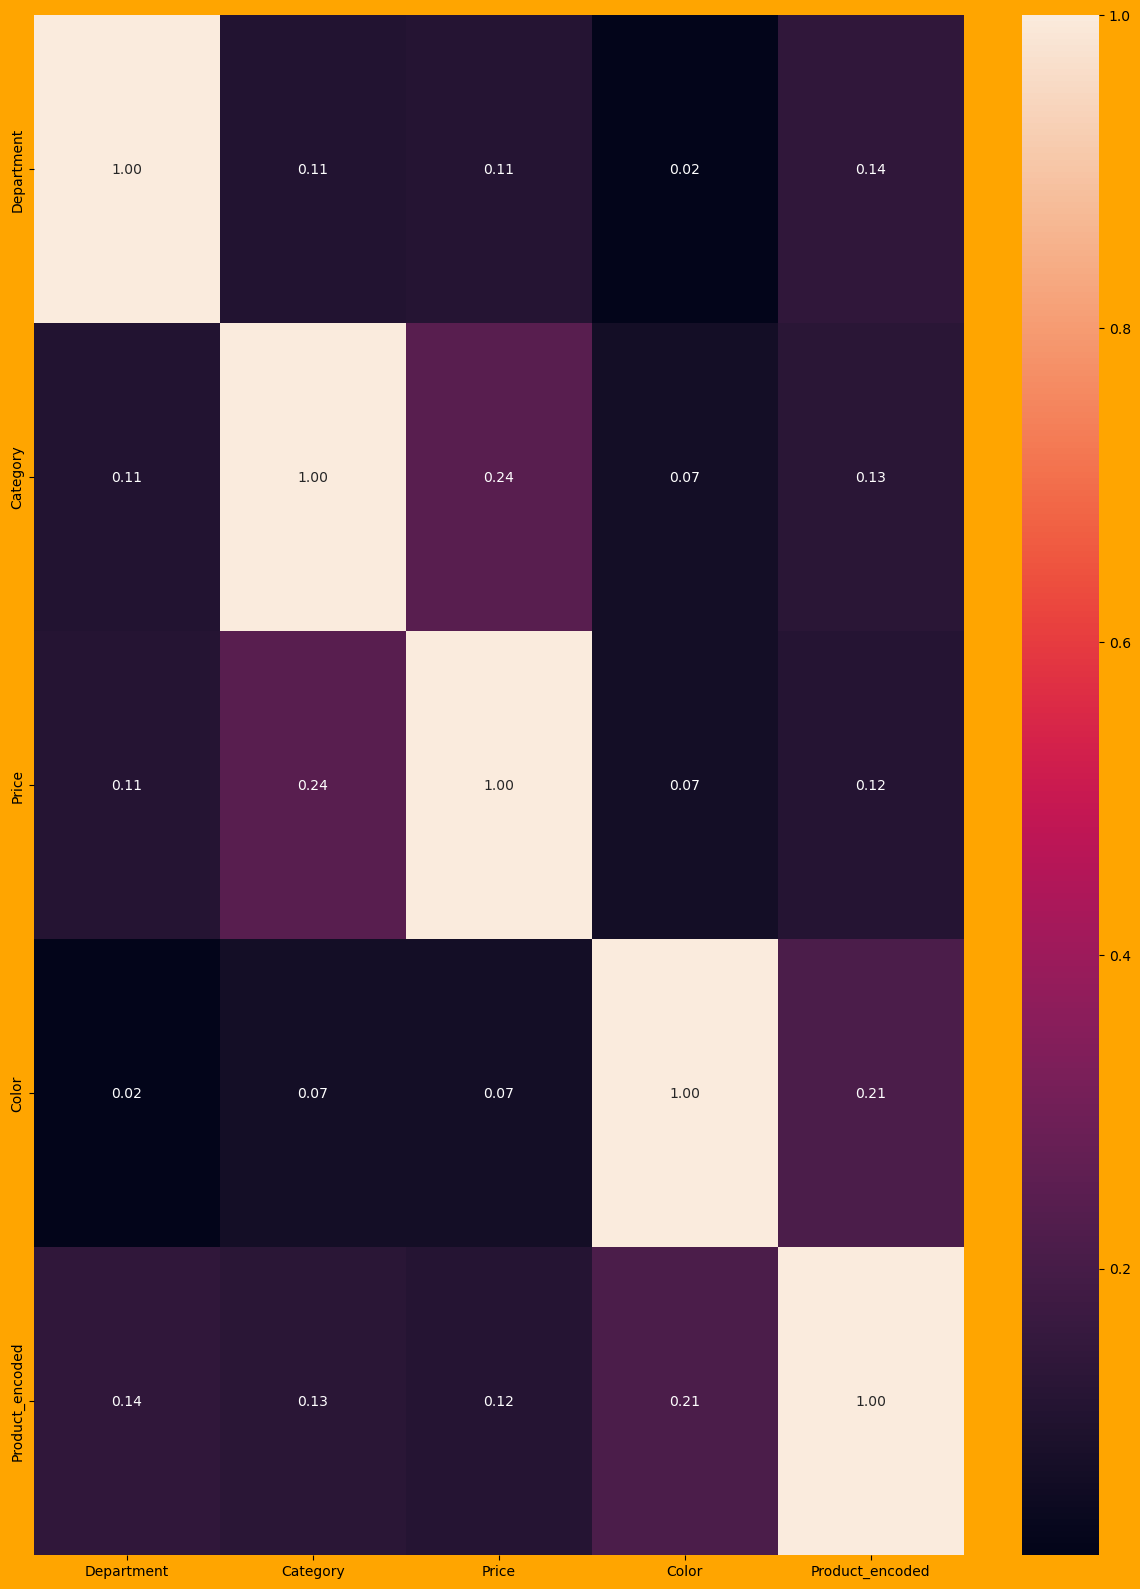

In [216]:
data_corr=df.corr().abs()
plt.figure(figsize=(15,20),facecolor='orange')
sns.heatmap(data_corr,annot=True,fmt='0.2f',linecolor='black')
plt.show()

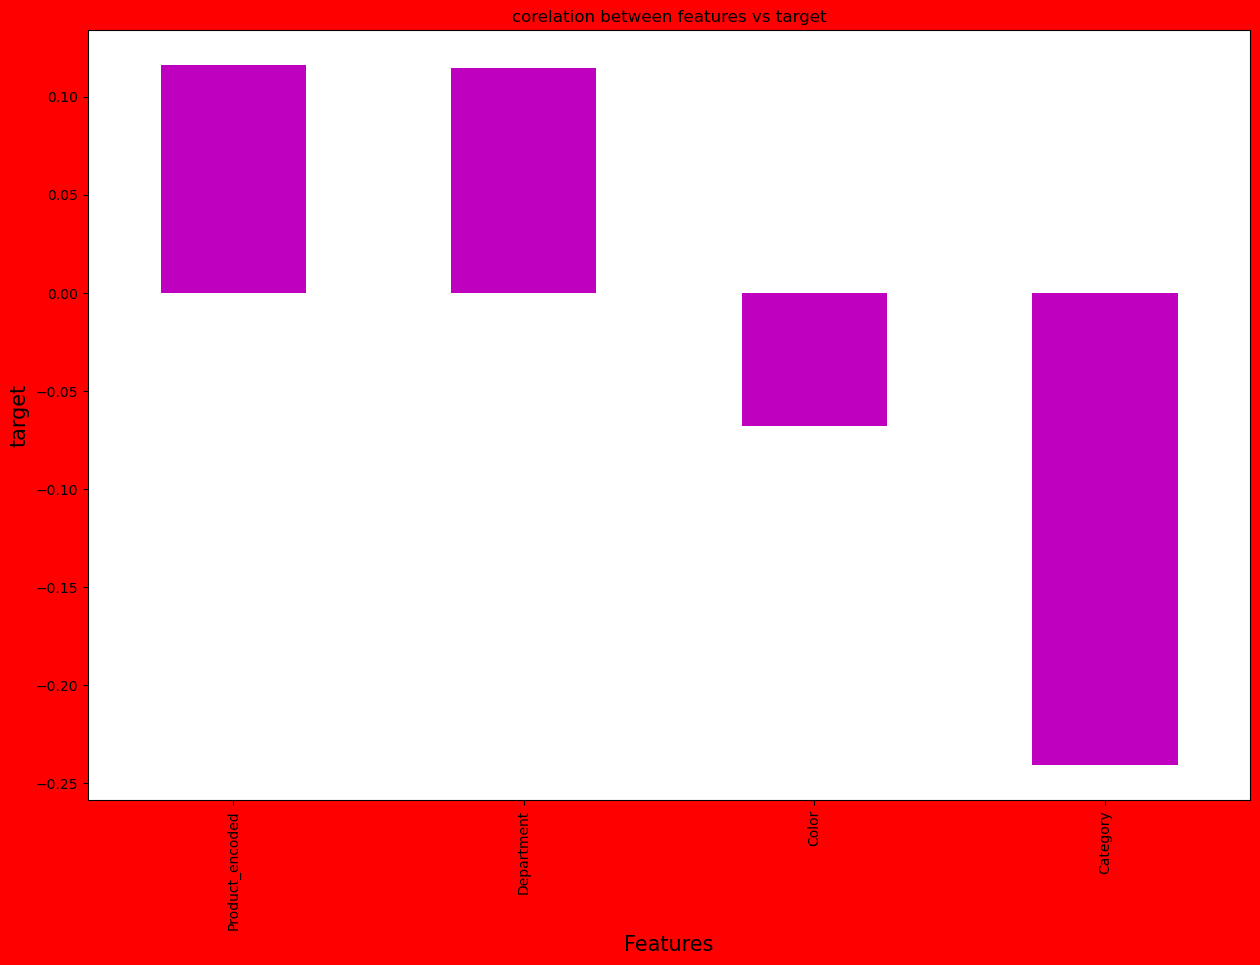

In [217]:
# visualise relarion between features and target
plt.figure(figsize=(15,10),facecolor='r')
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='m')
plt.xlabel('Features',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('corelation between features vs target')
plt.show()

In [ ]:
# all features contributing to the target variable 

In [218]:
# devide dataset into features and target
x=df.drop('Price',axis=1)
y=df['Price']

In [219]:
# feature data scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Department,Category,Color,Product_encoded
0,0.451554,-1.058173,-1.066817,0.781679
1,0.451554,-1.058173,1.549010,-0.943925
2,0.451554,-1.058173,0.278465,-0.296823
3,0.451554,-1.058173,0.278465,-0.404674
4,0.451554,-1.058173,0.876369,-0.728224
...,...,...,...,...
4008,0.451554,0.106594,-1.365769,2.237657
4009,0.451554,0.106594,-0.020486,0.350278
4010,0.451554,0.106594,-1.365769,2.237657
4011,0.451554,0.106594,0.726893,2.237657


In [220]:
# checking data for multicolinearity using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.030433,Department
1,1.034151,Category
2,1.057998,Color
3,1.088506,Product_encoded


In [221]:
# no multicolinearity between features
# model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor

In [223]:
maxACC=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    gbr=GradientBoostingRegressor()
    gbr.fit(x_train,y_train)
    pred=gbr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxRS=i
print('Accuracy score ', maxACC,'on random state ',maxRS)

Accuracy score  0.36473565667717556 on random state  140


In [224]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxRS)

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [226]:
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
LR_pred_train=LR.predict(x_train)
print('R2 score',r2_score(y_test,LR_pred)*100)
print('R2 score for trainng data',r2_score(y_train,LR_pred_train))
print('mean absolute error',mean_absolute_error(y_test,LR_pred))
print('mean squared error',mean_squared_error(y_test,LR_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,LR_pred)))


R2 score 10.738739026046273
R2 score for trainng data 0.09245067594067036
mean absolute error 356.0207275682546
mean squared error 215372.2249500932
Root mean absolute error 18.868511535578385


In [227]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBR_pred=GBR.predict(x_test)
GBR_pred_train=GBR.predict(x_train)
print('R2 score',r2_score(y_test,GBR_pred)*100)
print('R2 score for trainng data',r2_score(y_train,GBR_pred_train))
print('mean absolute error',mean_absolute_error(y_test,GBR_pred))
print('mean squared error',mean_squared_error(y_test,GBR_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,GBR_pred)))

R2 score 36.473565667717544
R2 score for trainng data 0.3352288193153349
mean absolute error 295.9908197546493
mean squared error 153278.46992080912
Root mean absolute error 17.20438373655532


In [228]:
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
KNN_pred=KNN.predict(x_test)
KNN_pred_train=KNN.predict(x_train)
print('R2 score',r2_score(y_test,KNN_pred)*100)
print('R2 score for trainng data',r2_score(y_train,KNN_pred_train))
print('mean absolute error',mean_absolute_error(y_test,KNN_pred))
print('mean absolute error',mean_squared_error(y_test,KNN_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,KNN_pred)))

R2 score 24.724312450874177
R2 score for trainng data 0.41778436375056005
mean absolute error 307.1651307596513
mean absolute error 181627.4174844334
Root mean absolute error 17.526127089566916


In [229]:
RIDGE=Ridge()
RIDGE.fit(x_train,y_train)
RIDGE_pred=RIDGE.predict(x_test)
RIDGE_pred_train=RIDGE.predict(x_train)
print('R2 score',r2_score(y_test,RIDGE_pred)*100)
print('R2 score for trainng data',r2_score(y_train,RIDGE_pred_train))
print('mean absolute error',mean_absolute_error(y_test,RIDGE_pred))
print('mean absolute error',mean_squared_error(y_test,RIDGE_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,RIDGE_pred)))

R2 score 10.738500183169908
R2 score for trainng data 0.09245066507639166
mean absolute error 356.02502807867995
mean absolute error 215372.80123728802
Root mean absolute error 18.868625495215063


In [230]:
LASSO=Lasso()
LASSO.fit(x_train,y_train)
LASSO_pred=LASSO.predict(x_test)
LASSO_pred_train=LASSO.predict(x_train)
print('R2 score',r2_score(y_test,LASSO_pred)*100)
print('R2 score for trainng data',r2_score(y_train,LASSO_pred_train))
print('mean absolute error',mean_absolute_error(y_test,LASSO_pred))
print('mean absolute error',mean_squared_error(y_test,LASSO_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,LASSO_pred)))

R2 score 10.721779450617962
R2 score for trainng data 0.09243730022614727
mean absolute error 356.1581406166979
mean absolute error 215413.1455180344
Root mean absolute error 18.872152516782442


In [231]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
DT_pred_train=DT.predict(x_train)
print('R2 score',r2_score(y_test,DT_pred)*100)
print('R2 score for trainng data',r2_score(y_train,DT_pred_train))
print('mean absolute error',mean_absolute_error(y_test,DT_pred))
print('mean absolute error',mean_squared_error(y_test,DT_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,DT_pred)))

R2 score 27.59832820553546
R2 score for trainng data 0.5277108085016331
mean absolute error 298.3944360698467
mean absolute error 174692.90680343774
Root mean absolute error 17.274097257739598


In [232]:
from sklearn.svm import SVR

SVM=SVR()
SVM.fit(x_train,y_train)
SVM_pred=SVM.predict(x_test)
SVM_pred_train=SVM.predict(x_train)
print('R2 score',r2_score(y_test,SVM_pred)*100)
print('R2 score for trainng data',r2_score(y_train,SVM_pred_train))
print('mean absolute error',mean_absolute_error(y_test,SVM_pred))
print('mean absolute error',mean_squared_error(y_test,SVM_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,SVM_pred)))

R2 score 7.638354637970901
R2 score for trainng data 0.04021370214786124
mean absolute error 349.7648620770242
mean absolute error 222852.9246015934
Root mean absolute error 18.70200155269548


In [233]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
ETR_pred=ETR.predict(x_test)
ETR_pred_train=ETR.predict(x_train)
print('R2 score',r2_score(y_test,ETR_pred)*100)
print('R2 score for trainng data',r2_score(y_train,ETR_pred_train))
print('mean absolute error',mean_absolute_error(y_test,ETR_pred))
print('mean absolute error',mean_squared_error(y_test,ETR_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,ETR_pred)))

R2 score 28.308282712198483
R2 score for trainng data 0.5277083121279671
mean absolute error 296.6454264037137
mean absolute error 172979.90745696897
Root mean absolute error 17.22339764401071


In [234]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
RFR_pred_train=RFR.predict(x_train)
print('R2 score',r2_score(y_test,RFR_pred)*100)
print('R2 score for trainng data',r2_score(y_train,RFR_pred_train))
print('mean absolute error',mean_absolute_error(y_test,RFR_pred))
print('mean absolute error',mean_squared_error(y_test,RFR_pred))
print('Root mean absolute error',np.sqrt(mean_absolute_error(y_test,RFR_pred)))

R2 score 30.996006181827475
R2 score for trainng data 0.521645129640079
mean absolute error 292.02997120982167
mean absolute error 166494.88834130255
Root mean absolute error 17.08888443432811


In [235]:
from sklearn.model_selection import cross_val_score

In [236]:
val_score=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print('r2 score ',r2_score(y_test,GBR_pred)*100)
print('cross validation score ',val_score)
print('average score :',val_score.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,GBR_pred)-val_score.mean())*100)

r2 score  36.473565667717544
cross validation score  [-0.36870546 -0.86031598 -0.74737793 -0.02274911 -0.78096538]
average score : -55.602277322760266
deference between r2 score and cross validation score : 92.07584299047781


In [196]:
val_score1=cross_val_score(LR,x,y)
print('r2 score ',r2_score(y_test,LR_pred)*100)
print('cross validation score ',val_score1)
print('average score :',val_score1.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,LR_pred)-val_score1.mean())*100)

r2 score  11.02361092812476
cross validation score  [-0.05676628 -1.67314865 -0.11346103 -0.1168165  -0.50230645]
average score : -49.24997805744869
deference between r2 score and cross validation score : 60.273588985573454


In [198]:
val_score2=cross_val_score(KNN,x,y)
print('r2 score ',r2_score(y_test,KNN_pred)*100)
print('cross validation score ',val_score2)
print('average score :',val_score2.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,KNN_pred)-val_score2.mean())*100)

r2 score  23.888539519465546
cross validation score  [-0.38896213 -1.83249711 -0.49635505 -0.2027604  -0.55629122]
average score : -69.5373184454151
deference between r2 score and cross validation score : 93.42585796488065


In [199]:
val_score3=cross_val_score(DT,x,y)
print('r2 score ',r2_score(y_test,DT_pred)*100)

print('cross validation score ',val_score3)
print('average score :',val_score3.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,DT_pred)-val_score3.mean())*100)

r2 score  27.421102272659624
cross validation score  [-0.63484985 -1.11428454 -0.71599143 -0.39862503 -0.66163042]
average score : -70.50762544880077
deference between r2 score and cross validation score : 97.92872772146039


In [201]:
val_score4=cross_val_score(RFR,x,y)
print('r2 score ',r2_score(y_test,RFR_pred)*100)
print('cross validation score ',val_score4)
print('average score :',val_score4.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,RFR_pred)-val_score4.mean())*100)

r2 score  30.91459993932022
cross validation score  [-0.50348528 -0.65574465 -0.73020945 -0.08410647 -0.7953118 ]
average score : -55.377152886550505
deference between r2 score and cross validation score : 86.29175282587073


In [202]:
val_score5=cross_val_score(RIDGE,x,y)
print('r2 score ',r2_score(y_test,RIDGE_pred)*100)
print('cross validation score ',val_score5)
print('average score :',val_score5.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,RIDGE_pred)-val_score5.mean())*100)

r2 score  11.023257678497178
cross validation score  [-0.05678378 -1.67242237 -0.11362493 -0.11664006 -0.50241617]
average score : -49.23774615842581
deference between r2 score and cross validation score : 60.26100383692299


In [204]:
val_score6=cross_val_score(SVM,x,y)
print('r2 score ',r2_score(y_test,SVM_pred)*100)
print('cross validation score ',val_score6)
print('average score :',val_score6.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,SVM_pred)-val_score6.mean())*100)

r2 score  7.558343088194041
cross validation score  [-0.24093929 -0.30538862 -0.15457434  0.00279748 -1.01289234]
average score : -34.21994205065354
deference between r2 score and cross validation score : 41.77828513884758


In [205]:
val_score7=cross_val_score(ETR,x,y)
print('r2 score ',r2_score(y_test,ETR_pred)*100)
print('cross validation score ',val_score7)
print('average score :',val_score7.mean()*100)
print('deference between r2 score and cross validation score :',(r2_score(y_test,ETR_pred)-val_score7.mean())*100)

r2 score  28.027892226174068
cross validation score  [-0.23996602 -0.47600293 -0.08837095 -0.09820483 -0.45074361]
average score : -27.065766782356686
deference between r2 score and cross validation score : 55.09365900853076


In [ ]:
# data is not enough to build a model and features are very less so  model accuracy is very low ...